In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)
import os
import re

In [11]:
notebook_wd = os.getcwd()
project_folder = re.match(r'(.*)[\\|\/]analysis', notebook_wd)
full_path = project_folder.group(1)

if os.name =='nt':
    data_path = '\\data\\'
else:
    data_path ='/data/'

full_path+data_path

'C:\\Users\\Doug\\Documents\\GitHub\\DC200_GradProj\\data\\'

In [12]:
stations = ['USS0022E07S','USS0022E10S','USS0022E11S','USS0021E07S']


In [13]:
df = pd.DataFrame()
df

""


In [14]:
for station in stations:
    fname = full_path+data_path+station+'.csv.gz'  
    df_temp = pd.read_csv(fname, names=["ID", "DATE", "ELEMENT", "VALUE", "FLAG1", "FLAG2", "FLAG3", "FLAG4"])
    df = df.append(df_temp, ignore_index=True)

In [15]:
df

,ID,DATE,ELEMENT,VALUE,FLAG1,FLAG2,FLAG3,FLAG4
0,USS0022E07S,19780930,TOBS,-5,NaN,NaN,T,NaN
1,USS0022E07S,19780930,WESD,0,NaN,NaN,T,NaN
2,USS0022E07S,19781001,TOBS,60,NaN,NaN,T,NaN
3,USS0022E07S,19781002,TOBS,56,NaN,NaN,T,NaN
4,USS0022E07S,19781003,TOBS,41,NaN,NaN,T,NaN
...,...,...,...,...,...,...,...,...
225369,USS0021E07S,20210415,WESD,9957,NaN,NaN,T,NaN
225370,USS0021E07S,20210416,WESD,9627,NaN,NaN,T,NaN
225371,USS0021E07S,20210417,WESD,9347,NaN,NaN,T,NaN
225372,USS0021E07S,20210418,WESD,9119,NaN,NaN,T,NaN


In [16]:
df = df.pivot(index=["ID", "DATE"], columns=["ELEMENT"],values="VALUE")

In [17]:
df = df.reset_index()

In [18]:
df

ELEMENT,ID,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,TOBS,WESD
0,USS0021E07S,19800709,NaN,NaN,NaN,NaN,NaN,-499.0,NaN
1,USS0021E07S,19800710,NaN,NaN,NaN,NaN,NaN,-500.0,NaN
2,USS0021E07S,19800711,NaN,NaN,NaN,NaN,NaN,-500.0,NaN
3,USS0021E07S,19800712,NaN,NaN,NaN,NaN,NaN,-499.0,NaN
4,USS0021E07S,19800713,NaN,NaN,NaN,NaN,NaN,-499.0,NaN
...,...,...,...,...,...,...,...,...,...
37049,USS0022E11S,20210415,25.0,NaN,102.0,176.0,26.0,93.0,0.0
37050,USS0022E11S,20210416,0.0,NaN,130.0,194.0,84.0,105.0,0.0
37051,USS0022E11S,20210417,0.0,NaN,147.0,231.0,64.0,108.0,0.0
37052,USS0022E11S,20210418,0.0,NaN,143.0,233.0,76.0,91.0,0.0


In [19]:
#convert everything to useful numbers and dates
df['id']= df['ID']
df['date'] = pd.to_datetime(df['DATE'], format='%Y%m%d', errors='ignore')
df['precipitation_mm'] = df['PRCP']/10
df['snow_depth_mm'] = df['SNWD']
df['temp_avg_c'] = df['TAVG']/10
df['temp_min_c'] = df['TMIN']/10
df['temp_max_c'] = df['TMAX']/10
df['temp_obs_c'] = df['TOBS']/10
df['water_snow_mm'] = df['WESD']/10


In [20]:
df2 = df[['id','date','temp_avg_c', 'precipitation_mm']]
df2     

ELEMENT,id,date,temp_avg_c,precipitation_mm
0,USS0021E07S,1980-07-09,NaN,NaN
1,USS0021E07S,1980-07-10,NaN,NaN
2,USS0021E07S,1980-07-11,NaN,NaN
3,USS0021E07S,1980-07-12,NaN,NaN
4,USS0021E07S,1980-07-13,NaN,NaN
...,...,...,...,...
37049,USS0022E11S,2021-04-15,10.2,2.5
37050,USS0022E11S,2021-04-16,13.0,0.0
37051,USS0022E11S,2021-04-17,14.7,0.0
37052,USS0022E11S,2021-04-18,14.3,0.0


<AxesSubplot:xlabel='date', ylabel='temp_avg_c'>

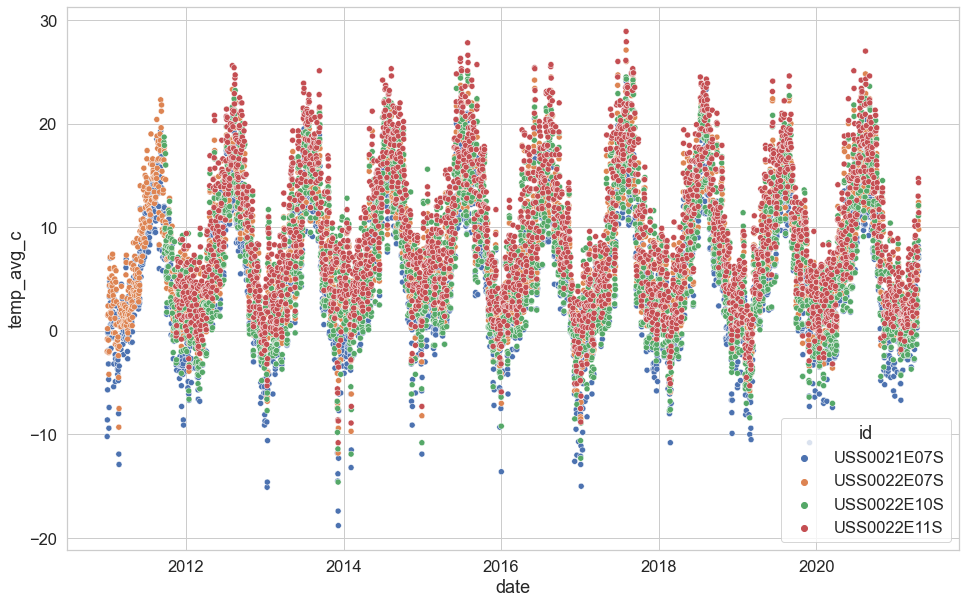

In [21]:
date = pd.to_datetime('20110101', format='%Y%m%d', errors='ignore')

plt.figure(figsize=(16, 10))
sns.scatterplot(data=df2[df2['date']>date], x = 'date', y ='temp_avg_c', hue = 'id')

<AxesSubplot:xlabel='date', ylabel='precipitation_mm'>

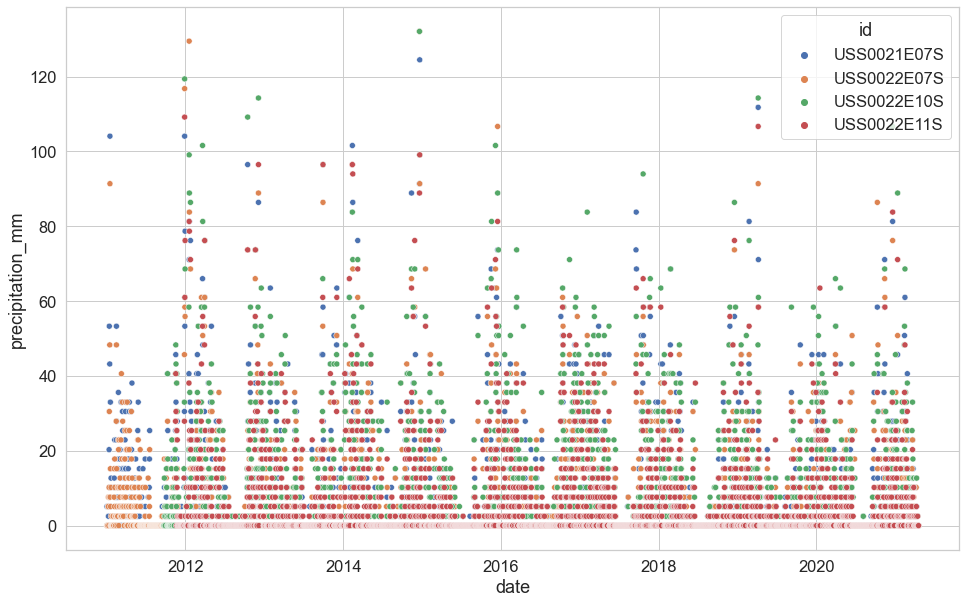

In [22]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df2[df2['date']>date], x = 'date', y ='precipitation_mm', hue = 'id')

In [23]:
df_precipitation_monthly = df2.groupby(['id', pd.Grouper(key="date", freq="M")]).sum().reset_index()
df_tavg_monthly = df2.groupby(['id', pd.Grouper(key="date", freq="M")]).mean().reset_index()


<AxesSubplot:xlabel='date', ylabel='precipitation_mm'>

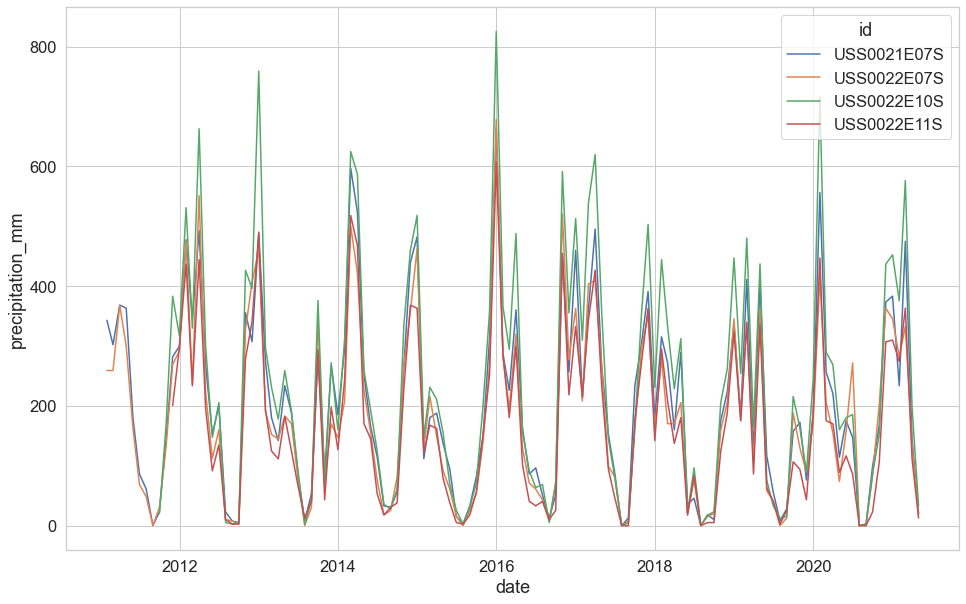

In [24]:

plt.figure(figsize=(16, 10))
sns.lineplot(data=df_precipitation_monthly [df_precipitation_monthly ['date']>date], x = 'date', y ='precipitation_mm', hue = 'id')

<AxesSubplot:xlabel='date', ylabel='temp_avg_c'>

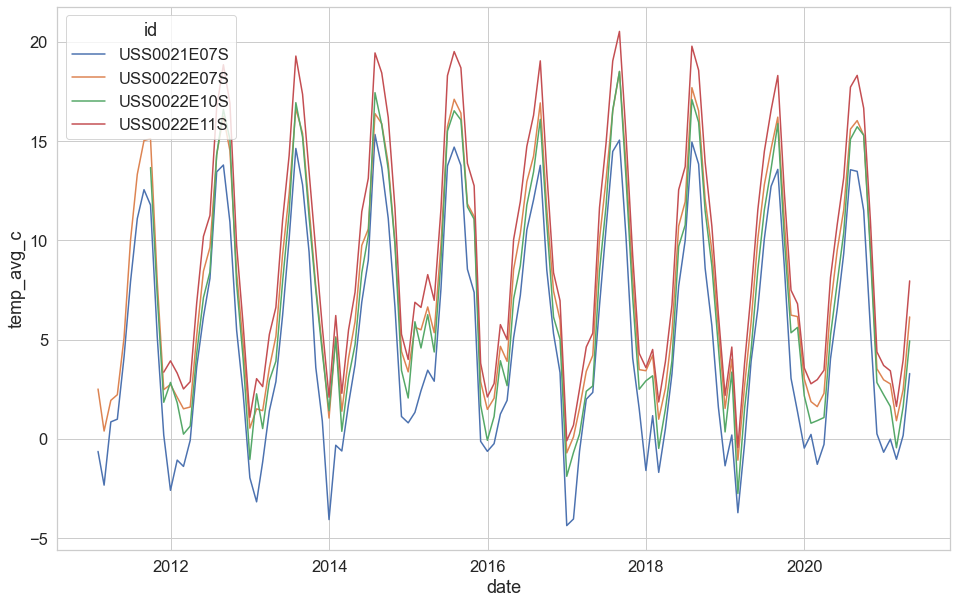

In [25]:

plt.figure(figsize=(16, 10))
sns.lineplot(data=df_tavg_monthly [df_tavg_monthly ['date']>date], x = 'date', y ='temp_avg_c', hue = 'id')

In [26]:
df2.to_csv(full_path+data_path+'ghcn_data_clean.csv')

# the next goal is to merge in the GHCN weather station data with missing data from the plant pollinator set.

In [27]:
df_pp = pd.read_csv(full_path+data_path+'plant_pollinator_diversity_set1.csv')

In [28]:
df_pp['TEMP'].isna().sum()

27692

In [29]:
# There are 27000 missing values in temp. So let's find out where they are, and how they line up to existing weather station data for that day

In [30]:
df_pp

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,...,PPI_STATUS,NO_INT,PLTSP_CODE,PLTSP_NAME,VISSP_CODE,VISSP_NAME,VISSP_TYPE,REF_NO,VISSP_NO,QC_NOTES
0,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ACHIMILL,Achillea millefolium,EPICPUNC,Epicauta puncticollis,predaceous beetle,NaN,1,NaN
1,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,1.0,ACHIMILL,Achillea millefolium,EVYLS5M,Evylaeus sp 5M,halictine bee,NaN,1,NaN
2,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,1,NaN
3,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,2,NaN
4,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,TRICORNA,Trichodes ornatus,bee-parasitic beetle,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74126,SA026,1,Frissell,RP2,RP210,2018,2018-07-09,2.0,RCT,10,...,1,2.0,DELPNUTT,Delphinium nuttallianum,BOMBMIXT,Bombus mixtus,NaN,NaN,1,NaN
74127,SA026,1,Frissell,RP2,RP210,2018,2018-07-09,2.0,RCT,10,...,1,1.0,GILICAPI,Gilia capitata,APISMELL,Apis mellifera,NaN,NaN,1,NaN
74128,SA026,1,Frissell,RP2,RP210,2018,2018-07-09,2.0,RCT,10,...,1,3.0,GILICAPI,Gilia capitata,APISMELL,Apis mellifera,NaN,NaN,2,NaN
74129,SA026,1,Frissell,RP2,RP210,2018,2018-07-09,2.0,RCT,10,...,1,1.0,GILICAPI,Gilia capitata,CONOSPXX,Conophorus sp,NaN,NaN,1,NaN


In [31]:
df_plot_temp_time = df_pp[['PLOT_ID','TEMP','START_TIME','SAMPLEDATE']]
df_plot_temp_time

,PLOT_ID,TEMP,START_TIME,SAMPLEDATE
0,BGD01,NaN,NaN,2011-07-24
1,BGD01,NaN,NaN,2011-07-24
2,BGD01,NaN,NaN,2011-07-24
3,BGD01,NaN,NaN,2011-07-24
4,BGD01,NaN,NaN,2011-07-24
...,...,...,...,...
74126,RP210,22.0,1315.0,2018-07-09
74127,RP210,22.0,1315.0,2018-07-09
74128,RP210,22.0,1315.0,2018-07-09
74129,RP210,22.0,1315.0,2018-07-09


In [32]:
#how many plots are affects

df_plot_temp_time[df_plot_temp_time['TEMP'].isna()].groupby(['PLOT_ID']).apply(lambda x: x.isna().sum()).sort_values(by='TEMP')

,PLOT_ID,TEMP,START_TIME,SAMPLEDATE
PLOT_ID,,,,
BGS03,0,1,0,0
CNE08,0,13,9,0
CNE07,0,19,18,0
CNE09,0,21,11,0
BGS07,0,26,8,0
...,...,...,...,...
FM209,0,501,353,0
FM207,0,508,176,0
FM208,0,528,277,0


In [33]:
#let's work on the plot with the most missing temperatures: FM204

df_FM204 = df_plot_temp_time[df_plot_temp_time['PLOT_ID']=='FM204']
df_FM204['SAMPLEDATE'].value_counts().sort_index()

2011-07-13      6
2011-07-25     33
2011-08-03     67
2011-08-16     30
2011-08-21     43
2011-09-08      5
2012-07-11     31
2012-07-23     97
2012-08-02     77
2012-08-09    281
2013-07-03     11
2013-07-11     28
2013-07-18     41
2013-07-23      7
2013-08-02      2
2013-08-07      9
2013-08-21      1
2014-07-07     15
2014-07-16     52
2014-07-25     21
2014-07-29     15
2014-08-05     15
2015-06-24     16
2015-06-30     19
2015-07-07     19
2015-07-14     21
2015-07-23     16
2016-06-27      1
2016-07-05     10
2016-07-12      3
2016-07-21     67
2016-07-28    117
2017-06-30     46
2017-07-14     28
2017-07-21     39
2017-07-28     88
2018-06-19      9
2018-07-03     25
2018-07-12     70
2018-07-24     40
Name: SAMPLEDATE, dtype: int64

In [34]:
date = pd.to_datetime('2018-07-24', format='%Y-%m-%d', errors='ignore')
date

Timestamp('2018-07-24 00:00:00')

In [35]:
#create model to predict temperature of sample time based on temperature at weather stations. 

In [36]:
# look at spread out temperatures on days that have temperature readings.
df_FM204_full = df_pp[df_pp['PLOT_ID']=='FM204']
df_FM204_full.groupby(['SAMPLEDATE']).std()['TEMP'].value_counts()

# this means that the temperatures on the dates are either all the same, or missing. 

0.0    23
Name: TEMP, dtype: int64

<ipython-input-38-4d1902dcfa69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FM204['TEMP_FILLED']= df_FM204['TEMP'].fillna(0)
<ipython-input-38-4d1902dcfa69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FM204['date']= pd.to_datetime(df_FM204['SAMPLEDATE'], format='%Y-%m-%d', errors='ignore')


<AxesSubplot:xlabel='date', ylabel='TEMP_FILLED'>

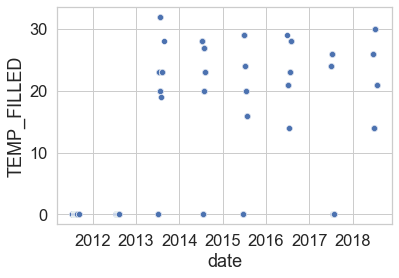

In [38]:
#plot the complex recorded temperature vs weather station temperature
df_FM204['TEMP_FILLED']= df_FM204['TEMP'].fillna(0)
df_FM204['date']= pd.to_datetime(df_FM204['SAMPLEDATE'], format='%Y-%m-%d', errors='ignore')
                                    
sns.scatterplot(data=df_FM204, x='date', y='TEMP_FILLED')

In [39]:
date_range = df_FM204['date']

date_range.min()
#filter date range in temperature data
temp_date= df2[(df2['date']>=date_range.min()) &(df2['date']<=date_range.max())]
temp_date[['id','date','temp_avg_c']]['temp_avg_c'].count()#pivot(columns='date', values=['date','temp_avg_c']).val

10065

In [40]:
temp_date_ok = temp_date.pivot(index = 'date', columns='id', values='temp_avg_c').reset_index()

In [41]:
temp_date_ok

id,date,USS0021E07S,USS0022E07S,USS0022E10S,USS0022E11S
0,2011-07-13,8.7,10.0,NaN,NaN
1,2011-07-14,9.5,11.6,NaN,NaN
2,2011-07-15,10.2,13.7,NaN,NaN
3,2011-07-16,9.9,11.6,NaN,NaN
4,2011-07-17,9.0,10.6,NaN,NaN
...,...,...,...,...,...
2564,2018-07-20,11.6,13.4,13.9,16.6
2565,2018-07-21,11.4,14.4,14.1,16.8
2566,2018-07-22,14.6,19.4,18.7,21.3
2567,2018-07-23,15.8,19.8,19.9,21.7


In [42]:
df_filled_in= pd.merge(df_FM204, df2, how='outer', on='date')
df_filled_in = df_filled_in.dropna(subset=['PLOT_ID'])


In [43]:
df_filled_in

,PLOT_ID,TEMP,START_TIME,SAMPLEDATE,TEMP_FILLED,date,id,temp_avg_c,precipitation_mm
0,FM204,NaN,NaN,2011-07-13,0.0,2011-07-13,USS0021E07S,8.7,0.0
1,FM204,NaN,NaN,2011-07-13,0.0,2011-07-13,USS0022E07S,10.0,0.0
2,FM204,NaN,NaN,2011-07-13,0.0,2011-07-13,USS0021E07S,8.7,0.0
3,FM204,NaN,NaN,2011-07-13,0.0,2011-07-13,USS0022E07S,10.0,0.0
4,FM204,NaN,NaN,2011-07-13,0.0,2011-07-13,USS0021E07S,8.7,0.0
...,...,...,...,...,...,...,...,...,...
5711,FM204,21.0,1002.0,2018-07-24,21.0,2018-07-24,USS0022E11S,22.9,0.0
5712,FM204,21.0,1002.0,2018-07-24,21.0,2018-07-24,USS0021E07S,17.0,0.0
5713,FM204,21.0,1002.0,2018-07-24,21.0,2018-07-24,USS0022E07S,21.1,0.0
5714,FM204,21.0,1002.0,2018-07-24,21.0,2018-07-24,USS0022E10S,20.5,0.0


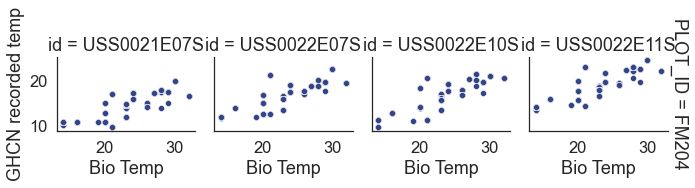

In [44]:
with sns.axes_style("white"):
    g = sns.FacetGrid(df_filled_in, row="PLOT_ID", col="id", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "TEMP", "temp_avg_c", color="#334488")
g.set_axis_labels("Bio Temp", "GHCN recorded temp")
#g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
#g.fig.subplots_adjust(wspace=.02, hspace=.02)

In [45]:
#no clear relationship between the data. Let's create a temperature model for each kind of complex 

In [55]:
df_pp['date'] = pd.to_datetime(df_pp['SAMPLEDATE'], format='%Y-%m-%d', errors='ignore')
df_complex_temp_time = df_pp[['PLOT_ID','COMPLEX','TEMP','START_TIME','SAMPLEDATE','date']]
df_complex_temp_time

,PLOT_ID,COMPLEX,TEMP,START_TIME,SAMPLEDATE,date
0,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24
1,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24
2,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24
3,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24
4,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24
...,...,...,...,...,...,...
74126,RP210,Frissell,22.0,1315.0,2018-07-09,2018-07-09
74127,RP210,Frissell,22.0,1315.0,2018-07-09,2018-07-09
74128,RP210,Frissell,22.0,1315.0,2018-07-09,2018-07-09
74129,RP210,Frissell,22.0,1315.0,2018-07-09,2018-07-09


In [56]:
df_complex_filled_in= pd.merge(df_complex_temp_time, df2, how='outer', on='date')
df_complex_filled_in = df_complex_filled_in.dropna(subset=['PLOT_ID'])
df_complex_filled_in 

,PLOT_ID,COMPLEX,TEMP,START_TIME,SAMPLEDATE,date,id,temp_avg_c,precipitation_mm
0,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24,USS0021E07S,16.4,0.0
1,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24,USS0022E07S,19.0,0.0
2,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24,USS0021E07S,16.4,0.0
3,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24,USS0022E07S,19.0,0.0
4,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24,USS0021E07S,16.4,0.0
...,...,...,...,...,...,...,...,...,...
275969,RP209,Frissell,27.0,1035.0,2016-07-26,2016-07-26,USS0022E11S,19.7,0.0
275970,RP209,Frissell,27.0,1035.0,2016-07-26,2016-07-26,USS0021E07S,14.7,0.0
275971,RP209,Frissell,27.0,1035.0,2016-07-26,2016-07-26,USS0022E07S,17.1,0.0
275972,RP209,Frissell,27.0,1035.0,2016-07-26,2016-07-26,USS0022E10S,16.6,0.0


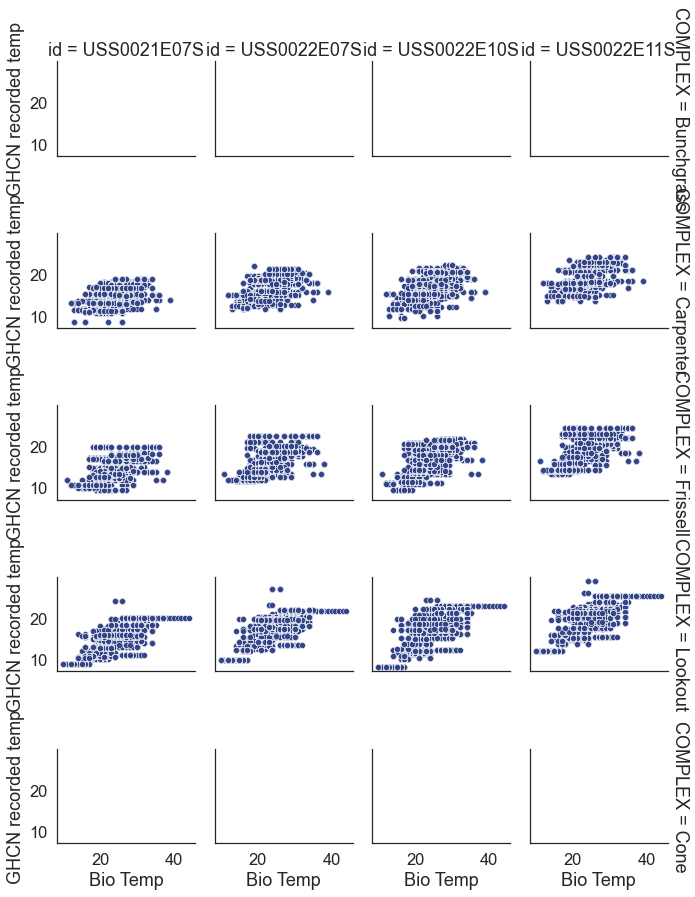

In [57]:
with sns.axes_style("white"):
    g = sns.FacetGrid(df_complex_filled_in , row="COMPLEX", col="id", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "TEMP", "temp_avg_c", color="#334488")
g.set_axis_labels("Bio Temp", "GHCN recorded temp")
#g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
#g.fig.subplots_adjust(wspace=.02, hspace=.02)

In [58]:
df_pp[df_pp['COMPLEX']=='Bunchgrass']['TEMP']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3465   NaN
3466   NaN
3467   NaN
3468   NaN
3469   NaN
Name: TEMP, Length: 3470, dtype: float64

In [59]:
df_pp[df_pp['COMPLEX']=='Cone']['TEMP']

3470   NaN
3471   NaN
3472   NaN
3473   NaN
3474   NaN
        ..
6735   NaN
6736   NaN
6737   NaN
6738   NaN
6739   NaN
Name: TEMP, Length: 3270, dtype: float64

In [60]:
df_pp['TEMP'].isna().sum()

27692

In [61]:
# so to fill out the missing data. Use a linear model to fit the input from all 4 weather stations to predict the temperature
# of recording of that day 
# X is the weather station data for those days. y is the actual recorded temp. index is the date

# Create temperature data set where number of rows = date range and number of columns = 8

display(df_pp)

df_pp2=df_pp[['COMPLEX', 'date','TEMP']]

#get only the relevant date range
date_min = df_pp2['date'].min()
date_max = df_pp2['date'].max()
temp_date_clean= df2[(df2['date']>=date_min) &(df2['date']<=date_max)]

temp_date_clean[['id','date','temp_avg_c']]

# pivot the data
temp_date_clean_ok = temp_date_clean.pivot(index = 'date', columns='id', values='temp_avg_c').reset_index()
temp_date_clean_ok['avg']=np.mean(temp_date_clean_ok[['USS0021E07S','USS0022E07S','USS0022E10S','USS0022E11S']], axis=1)

temp_date_clean_ok
#merge pollinator data with temperature data

df_complex_filled_in2= pd.merge(df_complex_temp_time, temp_date_clean_ok, how='outer', on='date')
df_complex_filled_in2
#X= pd.merge(temp_date_ok, df_pp2, how='outer', on='date')
#X

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,...,NO_INT,PLTSP_CODE,PLTSP_NAME,VISSP_CODE,VISSP_NAME,VISSP_TYPE,REF_NO,VISSP_NO,QC_NOTES,date
0,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,2.0,ACHIMILL,Achillea millefolium,EPICPUNC,Epicauta puncticollis,predaceous beetle,NaN,1,NaN,2011-07-24
1,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1.0,ACHIMILL,Achillea millefolium,EVYLS5M,Evylaeus sp 5M,halictine bee,NaN,1,NaN,2011-07-24
2,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,1,NaN,2011-07-24
3,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,2,NaN,2011-07-24
4,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,2.0,ERIGFOLI,Erigeron foliosus,TRICORNA,Trichodes ornatus,bee-parasitic beetle,NaN,1,NaN,2011-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74126,SA026,1,Frissell,RP2,RP210,2018,2018-07-09,2.0,RCT,10,...,2.0,DELPNUTT,Delphinium nuttallianum,BOMBMIXT,Bombus mixtus,NaN,NaN,1,NaN,2018-07-09
74127,SA026,1,Frissell,RP2,RP210,2018,2018-07-09,2.0,RCT,10,...,1.0,GILICAPI,Gilia capitata,APISMELL,Apis mellifera,NaN,NaN,1,NaN,2018-07-09
74128,SA026,1,Frissell,RP2,RP210,2018,2018-07-09,2.0,RCT,10,...,3.0,GILICAPI,Gilia capitata,APISMELL,Apis mellifera,NaN,NaN,2,NaN,2018-07-09
74129,SA026,1,Frissell,RP2,RP210,2018,2018-07-09,2.0,RCT,10,...,1.0,GILICAPI,Gilia capitata,CONOSPXX,Conophorus sp,NaN,NaN,1,NaN,2018-07-09


,PLOT_ID,COMPLEX,TEMP,START_TIME,SAMPLEDATE,date,USS0021E07S,USS0022E07S,USS0022E10S,USS0022E11S,avg
0,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24,16.4,19.0,NaN,NaN,17.700
1,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24,16.4,19.0,NaN,NaN,17.700
2,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24,16.4,19.0,NaN,NaN,17.700
3,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24,16.4,19.0,NaN,NaN,17.700
4,BGD01,Bunchgrass,NaN,NaN,2011-07-24,2011-07-24,16.4,19.0,NaN,NaN,17.700
...,...,...,...,...,...,...,...,...,...,...,...
76512,NaN,NaN,NaN,NaN,NaN,2018-07-29,17.7,21.7,21.5,23.7,21.150
76513,NaN,NaN,NaN,NaN,NaN,2018-08-01,14.6,18.5,17.4,20.3,17.700
76514,NaN,NaN,NaN,NaN,NaN,2018-08-03,11.4,13.9,11.9,15.6,13.200
76515,NaN,NaN,NaN,NaN,NaN,2018-08-04,11.3,15.5,14.5,17.2,14.625


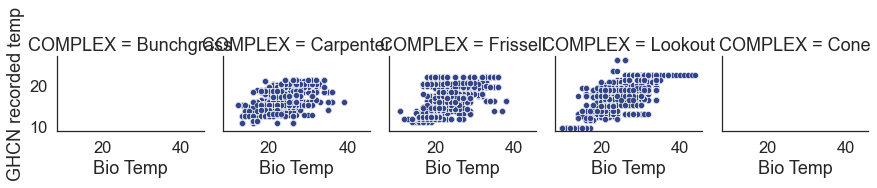

In [62]:
with sns.axes_style("white"):
    g = sns.FacetGrid(df_complex_filled_in2 , col="COMPLEX", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "TEMP", "avg", color="#334488")
g.set_axis_labels("Bio Temp", "GHCN recorded temp")

In [63]:
#create a linear regression for each complex
carpenter = df_complex_filled_in2[df_complex_filled_in2['COMPLEX']=='Carpenter'][['TEMP','avg']].dropna()
frissell = df_complex_filled_in2[df_complex_filled_in2['COMPLEX']=='Frissell'][['TEMP','avg']].dropna()
lookout = df_complex_filled_in2[df_complex_filled_in2['COMPLEX']=='Lookout'][['TEMP','avg']].dropna()
from sklearn.linear_model import LinearRegression

temp_model_carpenter = LinearRegression().fit(carpenter['avg'].to_numpy().reshape(-1, 1), carpenter['TEMP'].to_numpy())
temp_model_frissell = LinearRegression().fit(frissell['avg'].to_numpy().reshape(-1, 1), frissell['TEMP'].to_numpy())
temp_model_lookout = LinearRegression().fit(lookout['avg'].to_numpy().reshape(-1, 1), lookout['TEMP'].to_numpy())

temp_model_carpenter.score(carpenter['avg'].to_numpy().reshape(-1, 1), carpenter['TEMP'].to_numpy())

0.3871176524296196

In [ ]:
#pretty shitty R2....